In [2]:
from dotenv import load_dotenv
import os
import pandas as pd
load_dotenv()
base_dir = os.getenv('BASEDIR')
import re
import pickle as pk
from tqdm import tqdm
tqdm.pandas()

In [2]:
activity_profile = {}

### Qanda

In [43]:
import emoji

def extract_emojis(s):
    # return(''.join(c for c in s if c in emoji.UNICODE_EMOJI['en']))
    return(emoji.distinct_emoji_list(s))

In [45]:
dataset_name='qanda'
data = pd.read_csv(os.path.join(base_dir,'data','01_raw_data','qanda','qanda_emoji.csv'), dtype=str, names=['tid', 'rid' ,'qid', 'uid','name', 'bio', 'date', 'text_extended', 'text', 'hashtags', 'hashtags_extended', 'mentions', 'mentions_extended', 'urls_extended', 'urls'], index_col=False)

data['text'] = data['text'].fillna('')
data['bio'] = data['bio'].fillna('')
data['name'] = data['name'].fillna('')

In [46]:
data_per_user = data.groupby('uid').progress_apply(lambda d: pd.DataFrame({'name' : [d['name'].values[0]], 'bio' : [d['bio'].values[0]], 'text' : [' '.join(d['text'])] }))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 103074/103074 [00:46<00:00, 2206.85it/s]


In [47]:
emojis = data_per_user.progress_apply(lambda row: extract_emojis(row['name'] + row['bio'] + row['text']), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 103074/103074 [00:28<00:00, 3635.70it/s]


In [49]:
with open(os.path.join(base_dir,'data','01_raw_data',dataset_name,'qanda_emoji.pk'), 'wb') as wf:
    pk.dump(emojis ,wf)

In [ ]:
dataset_name='qanda'
data = pd.read_csv(os.path.join(base_dir,'data','01_raw_data','qanda','qanda_emoji.csv'), dtype=str)
data['hashtags'] = data['hashtags'].fillna('').apply(lambda s: s.split(';;;'))
data['mentions'] = data['mentions'].fillna('').apply(lambda s: s.split(';;;'))
data['urls'] = data['urls'].fillna('').apply(lambda s: s.split(';;;'))
# data['text_ht_censored'] = data['text'].apply(lambda t: re.sub(r'http\S+', '<URL>', t)).apply(lambda t: re.sub("#[A-Za-z0-9_]+","<HASHTAG>", t)) 
data['text'] = data['text'].fillna('').apply(lambda t: re.sub(r'http\S+', '', t)).apply(lambda t: re.sub("#[A-Za-z0-9_]+","", t)).apply(lambda t: re.sub(r'@\S+', '', t))
data['rid'] = data['rid'].combine_first(data['tid'])

# with open(os.path.join(base_dir,'data','01_raw_data',dataset_name,dataset_name+'_per_post.pk'), 'wb') as wf:
#     pk.dump(data, wf)

In [3]:
dataset_name='qanda'
data = pd.read_csv(os.path.join(base_dir,'data','01_raw_data','qanda','qanda_episodes.csv'), dtype=str)
data['hashtags'] = data['hashtags'].fillna('').apply(lambda s: s.split(';;;'))
data['mentions'] = data['mentions'].fillna('').apply(lambda s: s.split(';;;'))
data['urls'] = data['urls'].fillna('').apply(lambda s: s.split(';;;'))
# data['text_ht_censored'] = data['text'].apply(lambda t: re.sub(r'http\S+', '<URL>', t)).apply(lambda t: re.sub("#[A-Za-z0-9_]+","<HASHTAG>", t)) 
data['text'] = data['text'].fillna('').apply(lambda t: re.sub(r'http\S+', '', t)).apply(lambda t: re.sub("#[A-Za-z0-9_]+","", t)).apply(lambda t: re.sub(r'@\S+', '', t))
data['rid'] = data['rid'].combine_first(data['tid'])

with open(os.path.join(base_dir,'data','01_raw_data',dataset_name,dataset_name+'_per_post.pk'), 'wb') as wf:
    pk.dump(data, wf)

data_per_user = data.groupby('uid').progress_apply(lambda d: pd.DataFrame({'text' : ' '.join(d['text']),'hashtags': [[e for u in d['hashtags'] for e in u if e != '']],'rid':[list(d['rid'])], 'urls' : [[e for u in d['urls'] for e in u if e != '']] }))
data_per_user.to_csv(os.path.join(base_dir,'..','Moral_Foundation_FrameAxis','inputs',dataset_name+'_per_user.csv'))
data_per_user.to_csv(os.path.join(base_dir,'..','grievancedictionary','inputs',dataset_name+'_per_user.csv'))

with open(os.path.join(base_dir,'data','01_raw_data',dataset_name,dataset_name+'_per_user.pk'), 'wb') as wf:
    pk.dump(data_per_user ,wf)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 103074/103074 [00:50<00:00, 2040.05it/s]


In [4]:
activity_profile[dataset_name] = data.groupby('uid').count()['text'].values

### Ausvotes

In [5]:
dataset_name='ausvotes'
data = pd.read_csv(os.path.join(base_dir,'data','01_raw_data','ausvotes','ausvotes.csv'), dtype=str, header=None, names=['tid','cid','uid','created_at','text','urls', 'urls2', 'hashtags'])
data['urls'] = data['urls'].fillna('').apply(lambda s: s.split(';;;')) + data['urls2'].fillna('').apply(lambda s: s.split(';;;'))
data['hashtags'] = data['hashtags'].fillna('').apply(lambda s: s.split(';;;'))
data = data[~data.text.isna()]
data['text'] = data['text'].fillna('').apply(lambda t: re.sub(r'http\S+', '', t)).apply(lambda t: re.sub("#[A-Za-z0-9_]+","", t)).apply(lambda t: re.sub(r'@\S+', '', t))
data['rid'] = data['cid'].combine_first(data['tid'])

with open(os.path.join(base_dir,'data','01_raw_data',dataset_name,dataset_name+'_per_post.pk'), 'wb') as wf:
    pk.dump(data, wf)

data_per_user = data.groupby('uid').progress_apply(lambda d: pd.DataFrame({'text' : ' '.join(d['text']), 'rid':[list(d['rid'])], 'urls' : [[e for u in d['urls'] for e in u if e != '']], 'hashtags' : [[e for u in d['hashtags'] for e in u if e != '']] }))
data_per_user.to_csv(os.path.join(base_dir,'..','Moral_Foundation_FrameAxis','inputs',dataset_name+'_per_user.csv'))
data_per_user.to_csv(os.path.join(base_dir,'..','grievancedictionary','inputs',dataset_name+'_per_user.csv'))
with open(os.path.join(base_dir,'data','01_raw_data',dataset_name,dataset_name+'_per_user.pk'), 'wb') as wf:
    pk.dump(data_per_user ,wf)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 273874/273874 [03:25<00:00, 1335.92it/s]


In [68]:
activity_profile[dataset_name] = data.groupby('uid').count()['text'].values

### Social Sense

In [82]:
dataset_name='socialsense'

fb_data = pd.read_csv(os.path.join(base_dir,'data','01_raw_data','socialsense','fb_for_stance.csv'), dtype=str)[['index','text','text_urls', 'timestamp', 'user']]
fb_data['urls'] = fb_data['text_urls'].fillna('').apply(lambda s: s.strip().split(','))
fb_data['text'] = fb_data['text'].apply(lambda t: re.sub(r'http\S+', '', t)).apply(lambda t: re.sub("#[A-Za-z0-9_]+","", t)).apply(lambda t: re.sub(r'@\S+', '', t))
fb_data['id'] = fb_data['index']

fb_data['uid'] = fb_data['user']
fb_data['created_at'] = fb_data['timestamp']
fb_data['is_twitter'] = False

fb_data = fb_data[['id', 'text','urls', 'uid', 'created_at', 'is_twitter']]

id_uid_index = pd.read_csv(os.path.join(base_dir,'data','01_raw_data','socialsense','socialsense_id_uid_index.csv'), dtype=str, header=None, names=['id', 'cid','uid'])[['id','uid']]

tw_data = pd.read_csv(os.path.join(base_dir,'data','01_raw_data','socialsense','tw_for_stance_unrolled.csv'), dtype=str)[['id', 'text','text_urls_unrolled', 'date']]
tw_data = pd.merge(tw_data,id_uid_index, how='left', on='id')
tw_data['urls'] = tw_data['text_urls_unrolled'].fillna('').apply(lambda s: s.strip().split(','))
tw_data['text'] = tw_data['text'].apply(lambda t: re.sub(r'http\S+', '', t)).apply(lambda t: re.sub("#[A-Za-z0-9_]+","", t)).apply(lambda t: re.sub(r'@\S+', '', t))

tw_data['created_at'] = tw_data['date']
tw_data['is_twitter'] = True

tw_data = tw_data[['id', 'text','urls', 'uid', 'created_at', 'is_twitter']]

data = pd.concat([tw_data, fb_data])
data_filtered = data[~data['uid'].isna()]

data_per_user = data_filtered.groupby('uid').progress_apply(lambda d: pd.DataFrame({'text' : ' '.join(d['text']), 'urls' : [[e for u in d['urls'] for e in u if e != '']] }))
data_per_user.to_csv(os.path.join(base_dir,'..','Moral_Foundation_FrameAxis','inputs',dataset_name+'_per_user.csv'))
data_per_user.to_csv(os.path.join(base_dir,'..','grievancedictionary','inputs',dataset_name+'_per_user.csv'))
with open(os.path.join(base_dir,'data','01_raw_data',dataset_name,dataset_name+'_per_user.pk'), 'wb') as wf:
    pk.dump(data_per_user ,wf)

100%|██████████████████████████████████████████████████████████| 49442/49442 [00:21<00:00, 2311.72it/s]


In [83]:
activity_profile[dataset_name] = data.groupby('uid').count()['text'].values

### Riot

In [6]:
dataset_name='riot'
data = pd.read_csv(os.path.join(base_dir,'data','01_raw_data','riot','riot.csv'), dtype=str, header=None, names=['tid','cid','uid','created_at','text','urls', 'urls2', 'hashtags'])

data['urls'] = data['urls'].fillna('').apply(lambda s: s.split(';;;')) + data['urls2'].fillna('').apply(lambda s: s.split(';;;'))
data = data[~data.text.isna()]
data['hashtags'] = data['hashtags'].fillna('').apply(lambda s: s.split(';;;'))
data['text'] = data['text'].apply(lambda t: re.sub(r'http\S+', '', t)).apply(lambda t: re.sub("#[A-Za-z0-9_]+","", t)).apply(lambda t: re.sub(r'@\S+', '', t))
data['rid'] = data['cid'].combine_first(data['tid'])

with open(os.path.join(base_dir,'data','01_raw_data',dataset_name,dataset_name+'_per_post.pk'), 'wb') as wf:
    pk.dump(data, wf)

# data_per_user = data.groupby('uid').progress_apply(lambda d: pd.DataFrame({'text' : ' '.join(d['text']), 'rid':[list(d['rid'])], 'urls' : [[e for u in d['urls'] for e in u if e != '']] }))
data_per_user = data.groupby('uid').progress_apply(lambda d: pd.DataFrame({'text' : ' '.join(d['text']), 'rid':[list(d['rid'])], 'urls' : [[e for u in d['urls'] for e in u if e != '']], 'hashtags' : [[e for u in d['hashtags'] for e in u if e != '']] }))
data_per_user.to_csv(os.path.join(base_dir,'..','Moral_Foundation_FrameAxis','inputs',dataset_name+'_per_user.csv'))
data_per_user.to_csv(os.path.join(base_dir,'..','grievancedictionary','inputs',dataset_name+'_per_user.csv'))
with open(os.path.join(base_dir,'data','01_raw_data',dataset_name,dataset_name+'_per_user.pk'), 'wb') as wf:
    pk.dump(data_per_user ,wf)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 574281/574281 [05:06<00:00, 1876.66it/s]


In [7]:
activity_profile[dataset_name] = data.groupby('uid').count()['text'].values

### Parler

In [73]:
dataset_name='parler'
data = pd.read_csv(os.path.join(base_dir,'data','01_raw_data','parler','parler.csv'), dtype=str, header=None, names=['tid','uid','username','text','created_at','urls'])

data['urls'] = data['urls'].fillna('').apply(lambda s: s.split(';'))
data = data[~data.text.isna()]
data['text'] = data['text'].apply(lambda t: re.sub(r'http\S+', '', t)).apply(lambda t: re.sub("#[A-Za-z0-9_]+","", t)).apply(lambda t: re.sub(r'@\S+', '', t))
data['rid'] = data['tid']

data_per_user = data.groupby('uid').progress_apply(lambda d: pd.DataFrame({'text' : ' '.join(d['text']), 'rid':[list(d['rid'])], 'urls' : [[e for u in d['urls'] for e in u if e != '']] }))
data_per_user.to_csv(os.path.join(base_dir,'..','Moral_Foundation_FrameAxis','inputs',dataset_name+'_per_user.csv'))
data_per_user.to_csv(os.path.join(base_dir,'..','grievancedictionary','inputs',dataset_name+'_per_user.csv'))
with open(os.path.join(base_dir,'data','01_raw_data',dataset_name,dataset_name+'_per_user.pk'), 'wb') as wf:
    pk.dump(data_per_user ,wf)

100%|████████████████████████████████████████████████████████| 120048/120048 [00:55<00:00, 2162.04it/s]


In [74]:
activity_profile[dataset_name] = data.groupby('uid').count()['text'].values

In [84]:
activity_df = pd.concat([pd.DataFrame({'counts' : activity_profile[dataset_name], 'dataset' : dataset_name}) for dataset_name in ['qanda','ausvotes', 'socialsense', 'riot', 'parler']])

In [85]:
activity_profile

{'qanda': array([ 1,  1, 24, ...,  2,  2,  1]),
 'ausvotes': array([1, 1, 1, ..., 1, 1, 1]),
 'riot': array([1, 1, 2, ..., 1, 1, 1]),
 'parler': array([4, 2, 1, ..., 1, 1, 4]),
 'socialsense': array([7, 1, 2, ..., 3, 2, 1])}

In [87]:
activity_df.to_csv(os.path.join(base_dir, 'data', '03_processed', 'activity_profile.csv'), index=False)

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

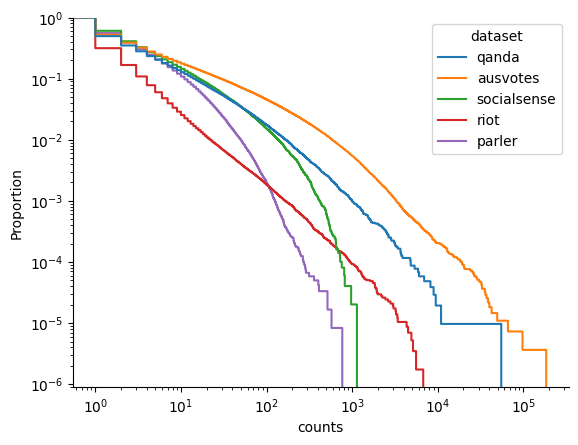

In [101]:
plot = sns.ecdfplot(data=activity_df, x="counts", hue="dataset",log_scale=(10,10), complementary=True)
# plot.legend(title = "Dataset")
sns.despine()
plt.savefig(os.path.join(base_dir, 'data', '05_plots','main_plots','activity_ecdf_profile.pdf'))